**生存率**：一个分类中存活的人数/分类中整体的人数<br/>
**因变量**：生存率 <br/>
**自变量**
- Sex
- Pclass
- Age
- Fare

问题：
- 生存率和性别的关系？
- 生存率和年龄的关系？
- 生存率和船舱等级的关系？

In [56]:
#读取表格，并查看表头
import pandas as pd
import seaborn as sns


df = pd.read_csv('titanic-data.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
#查看数据分布
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
#查看空值情况
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [59]:
#去掉有空值，且在研究范围外的列
del df['Cabin']
del df['Embarked']
df.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
dtype: bool

In [60]:
#使用fillna()函数用Age的均值填上空值
df = df.fillna(df.Age.mean())

In [61]:
#再次查看数据情况
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


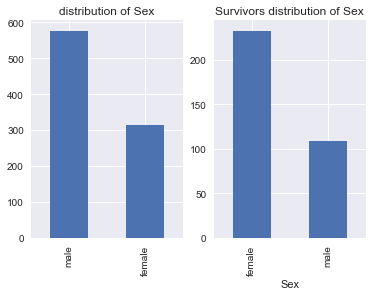

In [62]:
#船上人按照性别的分布
import matplotlib.pyplot as plt
%matplotlib inline 

df_Sex_S = df.groupby('Sex').sum()['Survived']


plt.subplot2grid((1,2),(0,0))
df.Sex.value_counts().plot(kind='bar')
plt.title('distribution of Sex')

plt.subplot2grid((1,2),(0,1))
df_Sex_S.plot(kind = 'bar')
plt.title('Survivors distribution of Sex')


,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


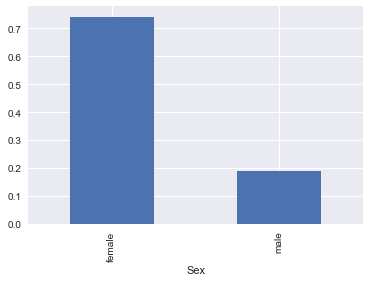

In [63]:
#不同性别的生还率
sex_p = df.groupby('Sex')['Survived']
sex_p.mean().plot(kind = 'bar')
sex_p.describe()

如上图，船上男性是多于女性的，事故发生后，存活的女性多余男性，而且女性生存率远高于男性生存率，可能是“在事故发生后，男性会主动把救生船让给女性”

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


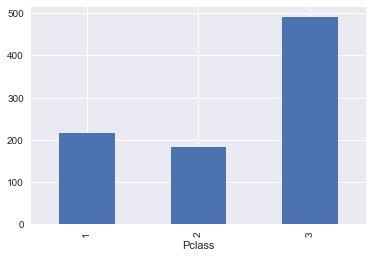

In [64]:
#乘客人数按照船舱等级分布情况
df.groupby('Pclass').count()['Name'].plot(kind ='bar')
df.groupby('Pclass').describe()['Survived']

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


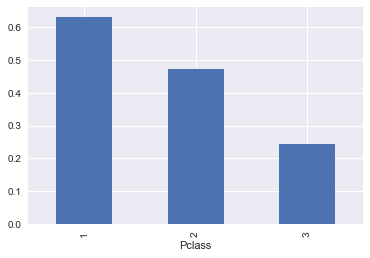

In [65]:
#不同船舱等级的生还率
diff_P = df.groupby('Pclass')['Survived']
diff_P.mean().plot(kind = 'bar')
diff_P.describe()

可见船上成员最多的是3等舱，在生还率方面而言，头等舱的生还率最高，而且船舱的等级越高生还率越高

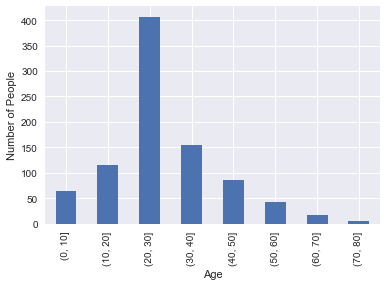

In [66]:
import numpy as np
#对乘客以10岁为一段分组，并添加列Age_group来标识
bins = np.arange(0,90,10)
df['Age_group']=pd.cut(df['Age'], bins)

df.groupby('Age_group')['Survived'].count().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Number of People')

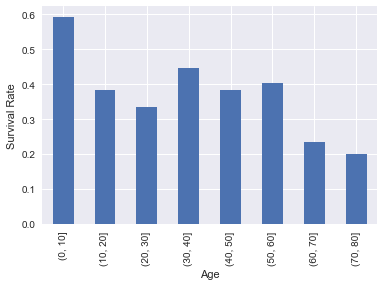

In [67]:
df.groupby('Age_group')['Survived'].mean().plot(kind='bar')
plt.xlabel("Age")
plt.ylabel('Survival Rate')

从数据上来看船上20-30岁的人数最多，不过因为使用了均值填充所以导致改数值明显偏大，事故发生后孩0-10岁孩子的生还率最高，可能是事故发生后，成年人优先让孩子上船

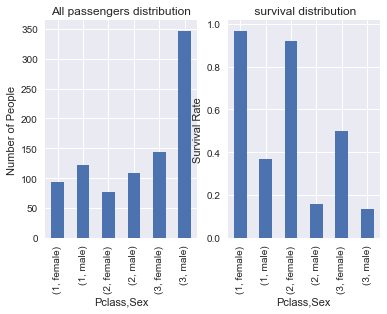

In [68]:
#查看不同船舱等级中乘客的性别分布


sex_pclass_survived = df.groupby(['Pclass','Sex']).sum()['Survived']
plt.subplot(121)
plt.title('All passengers distribution')
sex_pclass_all = df.groupby(['Pclass','Sex']).count()['Survived']

sex_pclass_all.plot(kind = 'bar')
plt.ylabel('Number of People')
plt.subplot(122)
plt.title(' survival distribution')
(sex_pclass_survived/sex_pclass_all).plot(kind = 'bar')
plt.ylabel('Survival Rate')


综合船舱等级和性别来看，首先再任何等级的船舱中女性存活率都比较高,高级舱的乘客存活率高于低级舱的乘客，其次头等舱的女性存活率最高，然后二级舱稍低一点，三级舱的女性存活率则低了很多，可能是因为三级舱人员太多导致逃生时更容易发生事故

**结论：**
- 因为数据具有缺失值，对于大量缺失的Cabin列采取的是舍弃，对于Age,使用的是用均值填充以尊重原始数据
- 因为均值接近30岁，所以会增加30岁人的数量，结果可能会影响到30岁左右人的生还率的问题
- 根据[网上资料](https://www.wikiwand.com/en/Sinking_of_the_RMS_Titanic#/Casualties_and_survivors),泰坦尼克号上总人数为2224人，该样本数据接近事故人数的一半，所以具有一定的可靠性，不过无法确定该样本的分布是否和总体接近，因此可信度存在着一定的疑问
- 未分析的Cabin,SibSp,Embarked,可能都存在着对生还率有影响，PassengerId,Ticket，Name无明显特征,分析的价值很低
- 虽然结论中未使用统计检验，不过因为结论是通过明显数据的差异得出的所以应该有一定的可靠性
- 通过对数据的分析所得到的是数据之间的相关性，无法得到因果关系，关于数据分析得到的是猜想，需要进一步的验证